# Autoregression and Moving Average

* Box-Jenkins (1976)
* No economic theory. For fitting and prediction only.

# Time Series Probability Model

* $X(t,\omega)$
* For a fixed $t=1,\ldots,T,$ $X(t,\cdot)$ is a random variable
* For a fixed $\omega \in \Omega$, $X(\cdot,\omega)$ is a sequence


# Some Simple Models

* White noise: $(e_t)_{t=-\infty}^{\infty}$:
    * $E[e_t] = 0$, $E[e_t^2] = \sigma_e^2$, and $E[e_t, e_s] = 0$ for all $t\neq s$. 

# ARMA


* AR(p) $$ y_t = \mu + \gamma_1 y_{t-1} + \cdots \gamma_p y_{t-p} + e_t $$
* MA(q) $$ y_t = \mu + e_t - \theta_1 e_{t-1} - \theta_q e_{t-q} + e_t $$
* ARMA(p,q) $$(1-\Gamma(L) ) y_t = \mu + \Theta (L) e_t$$

Stationarity: in AR form whether all roots lies out of the unit cycle.

# Autocorrelation Pattern


* MA(q): finite dependence
* AR(1): geometric decline
    * $E[ y_t ] = \mu / (1-\gamma_1)$
    * $\mathrm{var}[y_t] = \sigma_e^2 / (1-\gamma_1^2 )$
    * $E[ y_t | y_{t-1} ] = \mu + \gamma_1 y_{t-1}$
    * $\mathrm{var}[y_t | y_{t-1} ] = \sigma_e^2 $
    


# Modeling

* Transform into stationary time series by taking logarithm and/or difference.
* Fit ARMA(p,q)

# Estimation

* MLE for MA(q)
* MLE for ARMA(p,q)
* OLS for AR(p)


# AR(1) without drift

$$y_t = \gamma_1 y_{t-1} + e_t$$

$$
\begin{align*}
\sqrt{T} ( \hat{\gamma}_1 - \gamma_1 ) & = \sqrt{T} \frac{ \sum_{t=2}^T y_{t-1} e_t }{\sum_{t=2}^{T} y_{t-1}^2 } \\
& \stackrel{d}{\to} N \bigg( 0, \frac{  \mathrm{var}[y_t] \mathrm{var}[e_t] }{ (\mathrm{var}[y_t])^2 }  \bigg)\\
& \sim N \bigg(0, \frac{\sigma_e^2}{ \sigma_e^2 / (1-\gamma_1^2) } \bigg) \\
& \sim N\big(0,  1-\gamma_1^2  \big) 
\end{align*}
$$


        

What happens when $|\gamma_1| \to 1$?

# Unit Root

* ARIMA(1,1,0) $$y_t = \mu + y_{t-1} + e_t $$
* Nonstationary
* Brownian motion: normal innovation
* Random walk

## Implication
* mean
* variance
* $h$-period ahead forecast

The OLS estimator 
$$ T( \hat{\gamma}_1 - 1 ) \stackrel{d}{\to} \mbox{ a stable distribution}.$$
but the asymptotic distribution is not normal. 

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "SPY"

           SPY.Close
2018-11-27    268.40
2018-11-28    274.58
2018-11-29    273.98
2018-11-30    275.65
2018-12-03    279.30
2018-12-04    270.25

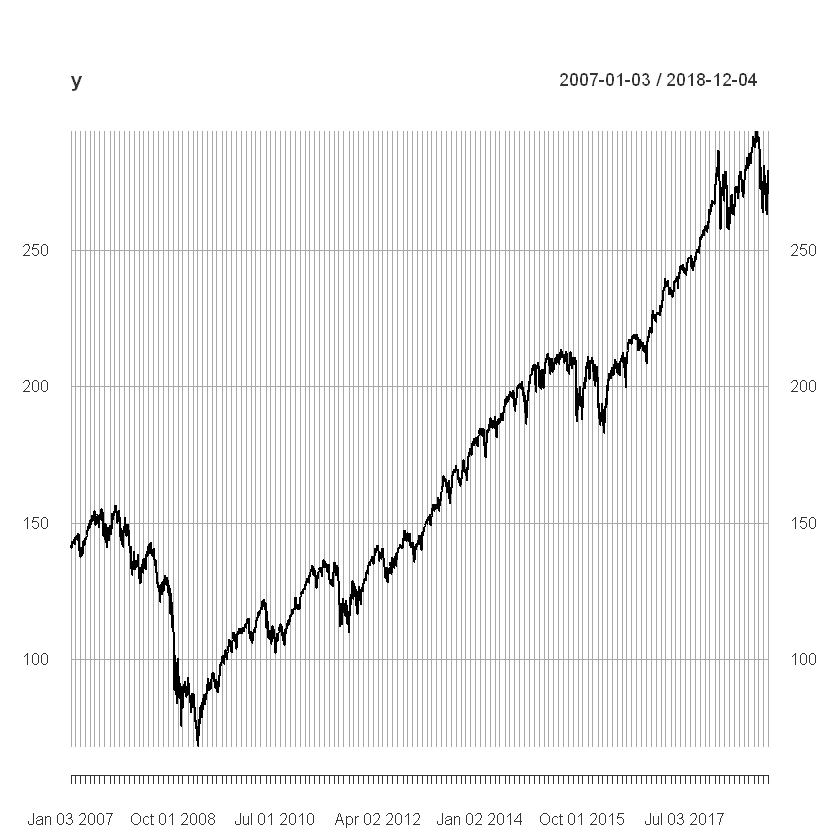

In [1]:
library(quantmod)
getSymbols("SPY") # S&P 500
y = SPY$SPY.Close
plot(y, type = "l")
tail(y)

* Null hypothesis: unit root.
$$ \Delta y_t = \mu + (\gamma_1 - 1 ) y_{t-1} + e_t = \mu+ \theta y_{t-1} + e_t$$
where $ \theta = \gamma_1 - 1 $. Under the null, $\theta = 0$.

* The $t$-statistic is the test statistic for the Dicky-Fuller test.
* Under the null, the $t$-statistic asymptotically follows a pivotal distribution.


* In this numerical example, the test does not reject the null.

Notice: the test is one-sided.

In [2]:
library(urca) # package for unit root and cointegration
print( summary(ur.df(y, type = "drift", lags = 0) ) )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5666  -0.7218   0.0488   0.8584  12.8099 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 3.709e-02  1.029e-01    0.36    0.719
z.lag.1     3.454e-05  5.795e-04    0.06    0.952

Residual standard error: 1.716 on 3000 degrees of freedom
Multiple R-squared:  1.184e-06,	Adjusted R-squared:  -0.0003321 
F-statistic: 0.003552 on 1 and 3000 DF,  p-value: 0.9525


Value of test-statistic is: 0.0596 0.9408 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.43 -2.86 -2.57
phi1  6.43  4.59  3.78



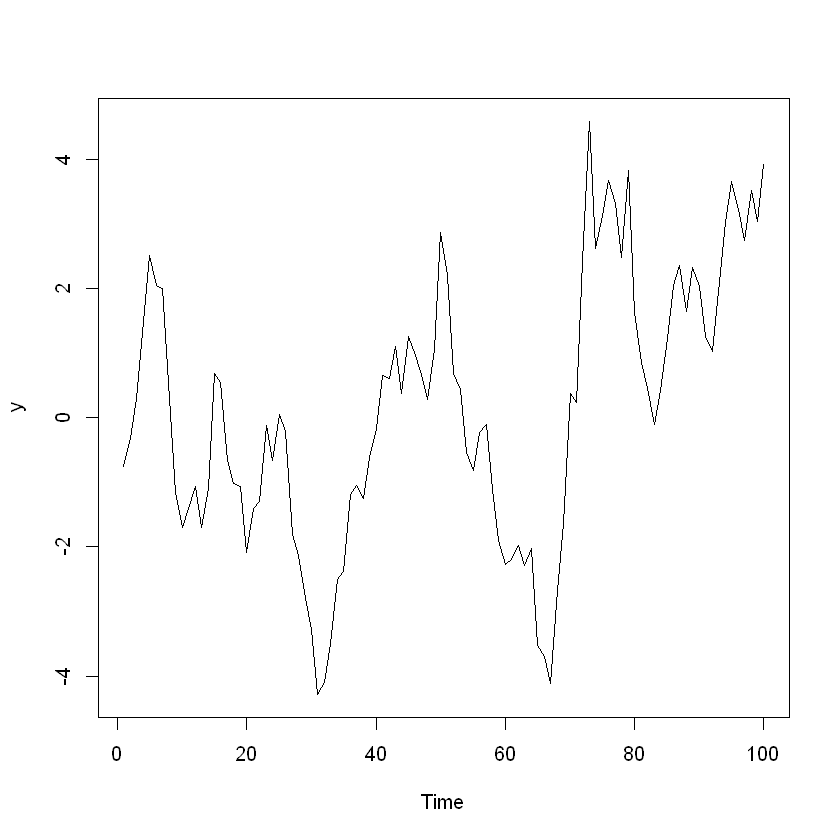

In [3]:
y = arima.sim( model = list(ar =.95), n = 100)
plot(y)


In [4]:
library(urca); summary( ur.df( y, type = "none", selectlags = "AIC" ) ) # , 


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0785 -0.4516 -0.1023  0.7102  2.2288 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)  
z.lag.1    -0.09438    0.04407  -2.141   0.0348 *
z.diff.lag  0.18330    0.10220   1.794   0.0760 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8739 on 96 degrees of freedom
Multiple R-squared:  0.06181,	Adjusted R-squared:  0.04226 
F-statistic: 3.162 on 2 and 96 DF,  p-value: 0.04678


Value of test-statistic is: -2.1414 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


## Specification of DF test

* Drift and trend
* Augmented Dicky-Fuller test: add more differenced lag terms

## Other tests
* Phillips-Perron test
* KPSS test

# Cointegration

In a regression
$$y_t = \beta x_t  + e_t$$

* If $y_t$ and $x_t$ are I(1) series
* But a linear combination $e_t = y_t - \beta x_t $ is I(0)

then we say $y_t$ and $x_t$ are cointegrated.

In [5]:
data(denmark)
?denmark

period: Time index from 1974:Q1 until 1987:Q3.
* `LRM`	Logarithm of real money, M2.
* `LRY`	Logarithm of real income.
* `LPY`	Logarithm of price deflator.
* `IBO`	Bond rate.
* `IDE`	Bank deposit rate.

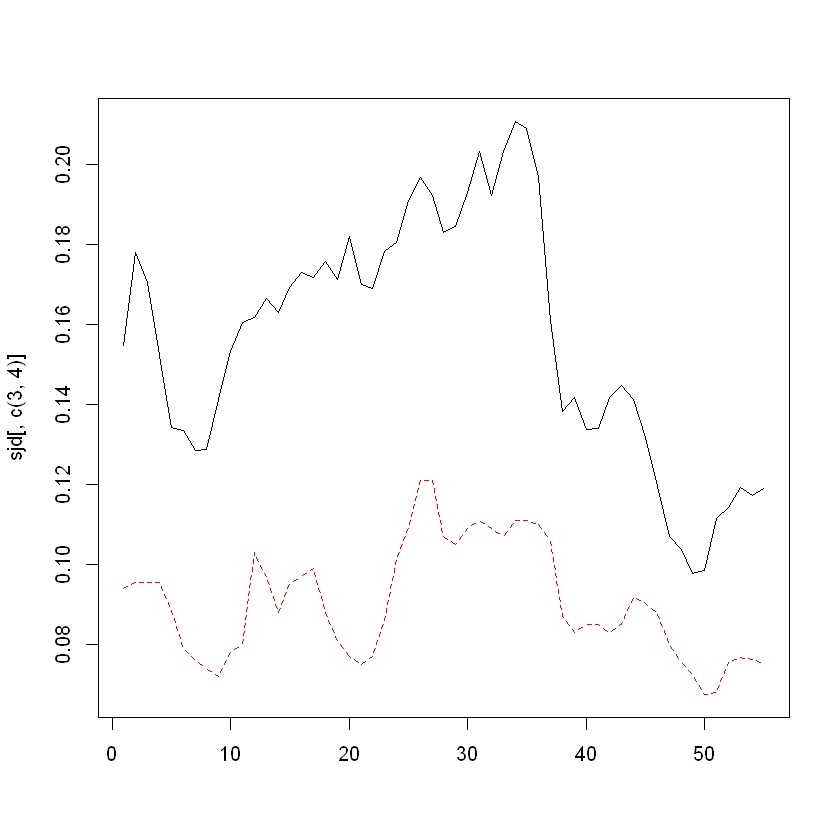

In [6]:
sjd <- denmark[, c("LRM", "LRY", "IBO", "IDE")]
matplot(sjd[,c(3,4)], type = "l")

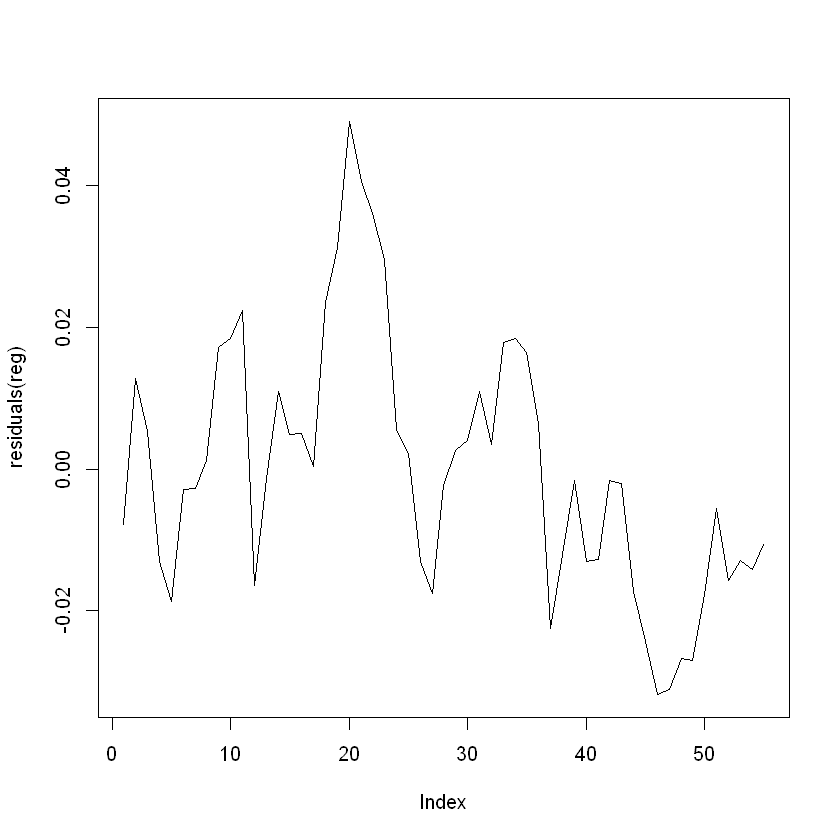

In [7]:
y = sjd[,3]; x = sjd[,4]
reg = lm(y~x)
plot(residuals(reg), type = "l")

# Source of Cointegration

Common shock is the source of cointegration

For example, if $y_{1t} = \mu_1 + \beta_1 t + e_{1t}$ and $y_{2t} = \mu_2 + \beta_2 t + e_{2t}$, where $e_{1t}$ and $e_{2t}$ are two white noises, then the cointegration vector must be $(1,\theta)$ where $$\theta = - \beta_1 / \beta_2$$.

# Cointegration 

More generally, for an $m$-vector $y_t$ is cointegrated if there exists a parameter vector $\gamma$ (normalize the first element to be 1) such that $y_t ' \gamma$ is I(0).



* The number of linear independent cointegrated vectors is called the **cointegration rank**. 
* The cointegration rank arranges from 1 to $m-1$.

# VECM Representation

For the $m$-equation VAR system 
$$y_t = \Gamma y_{t-1} + e_t,$$ we can rewrite it as
$$ \Delta y_t = (\Gamma - I_m) y_{t-1} + e_t = \Pi y_{t-1} + e_t.$$

* Since LHS is stationary, the $m\times m$ matrix $\Pi$ on the RHS must only have rank $r$. 
* Otherwise, the RHS will be I(1) and the two sides of the equation are unbalanced.
* VECM is the base for the cointegration rank test (Johansen, 1992).

# Numerical Example: Johansen Test

The result shows that there is only 1 cointegration relationship among the 4 time series.

In [8]:
sjd.vecm = ca.jo(sjd, ecdet = "const", type="eigen", K=2, spec="longrun")
summary(sjd.vecm)



###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 4.696767e-01 1.742411e-01 1.180826e-01 4.224854e-02 2.729552e-15

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  2.29  7.52  9.24 12.97
r <= 2 |  6.66 13.75 15.67 20.20
r <= 1 | 10.15 19.77 22.00 26.81
r = 0  | 33.62 25.56 28.14 33.24

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             LRM.l2     LRY.l2    IBO.l2      IDE.l2   constant
LRM.l2    1.0000000  1.0000000  1.000000   1.0000000  1.0000000
LRY.l2   -0.9691164 -1.3759873 -2.259218  -0.1438558 -0.4095683
IBO.l2    5.4027719 -0.3351646  1.640803 -11.7073710  2.3548120
IDE.l2   -4.1403255  9.0058943 -3.719279   7.5375133 -1.1374017
constant -6.4780511 -4.3297635  1.786142 -10.2593484 -9.5375812

Weights W:
(This is the loading matrix